In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

In [5]:
data = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")
test

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent
...,...,...,...,...,...,...,...,...,...,...,...,...
10081,Uganda,2018,uniqueid_2998,Rural,No,2,62,Female,Spouse,Married/Living together,Primary education,Self employed
10082,Uganda,2018,uniqueid_2999,Urban,Yes,8,42,Male,Head of Household,Married/Living together,Primary education,Self employed
10083,Uganda,2018,uniqueid_3000,Urban,Yes,1,39,Male,Head of Household,Single/Never Married,Secondary education,Other Income
10084,Uganda,2018,uniqueid_3001,Rural,Yes,6,28,Female,Spouse,Married/Living together,Primary education,Self employed


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [7]:
data.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [8]:
data.isna().sum()
# test.isna().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

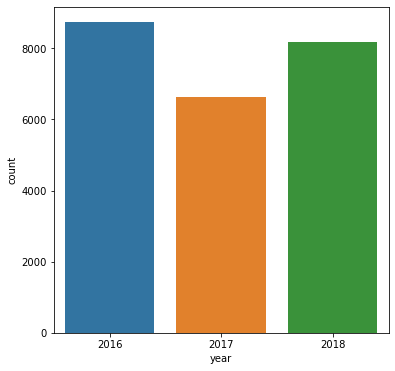

In [9]:
plt.figure(figsize=(6,6))
sns.countplot(x='year', data=data)
plt.show()

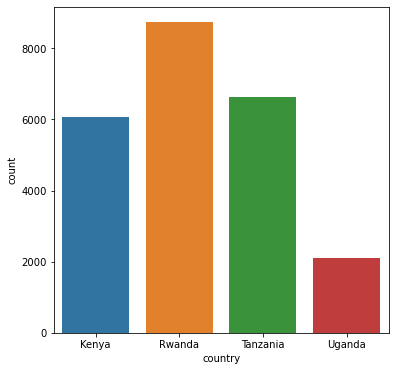

In [10]:
plt.figure(figsize=(6,6))
sns.countplot(x='country', data=data)
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


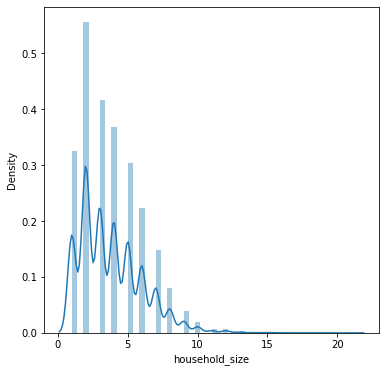

In [11]:
plt.figure(figsize=(6,6))
sns.distplot(data["household_size"])
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='household_size'>

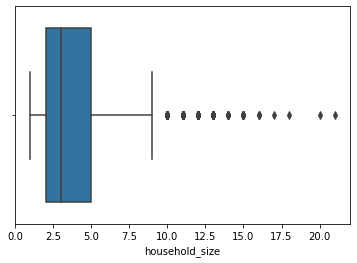

In [12]:
sns.boxplot(data['household_size'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age_of_respondent'>

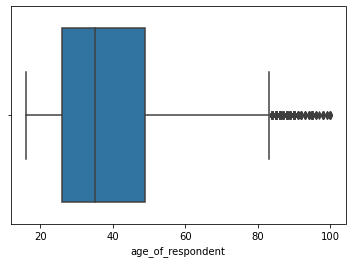

In [13]:
sns.boxplot(data['age_of_respondent'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year'>

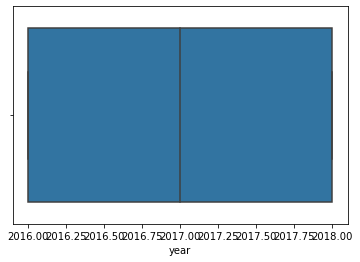

In [14]:
sns.boxplot(data['year'])

In [15]:
data.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [16]:
data["job_type"].value_counts()

Self employed                   6437
Informally employed             5597
Farming and Fishing             5441
Remittance Dependent            2527
Other Income                    1080
Formally employed Private       1055
No Income                        627
Formally employed Government     387
Government Dependent             247
Dont Know/Refuse to answer       126
Name: job_type, dtype: int64

In [17]:
data.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [18]:
X = data.drop("uniqueid",axis=1)
testdf = test.drop("uniqueid",axis=1)

In [19]:
X

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [20]:
testdf

,country,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent
...,...,...,...,...,...,...,...,...,...,...,...
10081,Uganda,2018,Rural,No,2,62,Female,Spouse,Married/Living together,Primary education,Self employed
10082,Uganda,2018,Urban,Yes,8,42,Male,Head of Household,Married/Living together,Primary education,Self employed
10083,Uganda,2018,Urban,Yes,1,39,Male,Head of Household,Single/Never Married,Secondary education,Other Income
10084,Uganda,2018,Rural,Yes,6,28,Female,Spouse,Married/Living together,Primary education,Self employed


In [21]:
data["education_level"].value_counts()

Primary education                  12791
No formal education                 4515
Secondary education                 4223
Tertiary education                  1157
Vocational/Specialised training      803
Other/Dont know/RTA                   35
Name: education_level, dtype: int64

In [22]:
data["job_type"].value_counts()

Self employed                   6437
Informally employed             5597
Farming and Fishing             5441
Remittance Dependent            2527
Other Income                    1080
Formally employed Private       1055
No Income                        627
Formally employed Government     387
Government Dependent             247
Dont Know/Refuse to answer       126
Name: job_type, dtype: int64

In [23]:
data["bank_account"].value_counts()

No     20212
Yes     3312
Name: bank_account, dtype: int64

In [24]:
data["location_type"].value_counts()

Rural    14343
Urban     9181
Name: location_type, dtype: int64

In [25]:
data["gender_of_respondent"].value_counts()

Female    13877
Male       9647
Name: gender_of_respondent, dtype: int64

In [26]:
data["cellphone_access"].value_counts()

Yes    17454
No      6070
Name: cellphone_access, dtype: int64

In [27]:
categorical_vars = ["country","relationship_with_head",'marital_status','education_level', 'job_type']

In [28]:
# data = pd.get_dummies(data, prefix_sep="_", columns=categorical_vars)
scaler = StandardScaler()

In [29]:
ohe = OneHotEncoder(sparse= False)
# ordinal_encoder = OrdinalEncoder()
le = LabelEncoder()
X['bank_account'] = le.fit_transform(X['bank_account'])
Y = X['bank_account']

In [30]:
X = X.drop(columns=['bank_account'], axis=1)

In [31]:
X[["household_size", "age_of_respondent", "year"]] = X[["household_size", "age_of_respondent", "year"]].values.astype(float)
testdf[["household_size", "age_of_respondent", "year"]] = testdf[["household_size", "age_of_respondent", "year"]].values.astype(float)
X = pd.get_dummies(X, prefix_sep="_", columns=categorical_vars)
testdf = pd.get_dummies(testdf, prefix_sep="_", columns=categorical_vars)

In [32]:
# data[ohe.get_feature_names()] = ohe.fit_transform(data[categorical_vars])  
# encoded_data = ohe.fit_transform(data[categorical_vars])
# encoded_datat = ohe.fit_transform(test[categorical_vars])
# encoded_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names(categorical_vars))
# encoded_dft = pd.DataFrame(encoded_datat, columns=ohe.get_feature_names(categorical_vars))
X["location_type"] = le.fit_transform(X["location_type"])
X["cellphone_access"] = le.fit_transform(X["cellphone_access"])
X["gender_of_respondent"] = le.fit_transform(X["gender_of_respondent"])
testdf["location_type"] = le.fit_transform(testdf["location_type"])
testdf["cellphone_access"] = le.fit_transform(testdf["cellphone_access"])
testdf["gender_of_respondent"] = le.fit_transform(testdf["gender_of_respondent"])
# data = pd.concat([data.drop(categorical_vars, axis=1), encoded_df], axis=1)

In [33]:
# test = pd.concat([test.drop(categorical_vars, axis=1), encoded_dft], axis=1)
scaler = MinMaxScaler(feature_range=(0, 1))
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X

,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,...,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,1.0,0.0,1.0,0.10,0.095238,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.20,0.642857,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.20,0.119048,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.20,0.214286,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.35,0.119048,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,1.0,0.0,1.0,0.15,0.380952,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
23520,1.0,0.0,1.0,0.05,0.130952,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
23521,1.0,0.0,1.0,0.20,0.130952,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
23522,1.0,1.0,1.0,0.30,0.166667,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [34]:
testdf =  pd.DataFrame(scaler.fit_transform(testdf), columns = testdf.columns)

In [35]:
testdf

,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,...,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,1.0,1.0,1.0,0.105263,0.166667,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.315789,0.416667,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.105263,0.726190,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.263158,0.273810,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,1.0,0.0,0.105263,0.000000,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10081,1.0,0.0,0.0,0.052632,0.547619,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10082,1.0,1.0,1.0,0.368421,0.309524,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10083,1.0,1.0,1.0,0.000000,0.273810,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10084,1.0,0.0,1.0,0.263158,0.142857,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [36]:
X

,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,...,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,1.0,0.0,1.0,0.10,0.095238,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.20,0.642857,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.20,0.119048,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.20,0.214286,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.35,0.119048,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,1.0,0.0,1.0,0.15,0.380952,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
23520,1.0,0.0,1.0,0.05,0.130952,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
23521,1.0,0.0,1.0,0.20,0.130952,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
23522,1.0,1.0,1.0,0.30,0.166667,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [37]:
Y

0        1
1        0
2        1
3        0
4        0
        ..
23519    0
23520    0
23521    0
23522    0
23523    0
Name: bank_account, Length: 23524, dtype: int32

Using train_test_split

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [39]:
print(X.shape, X_train.shape, X_test.shape)

(23524, 37) (18819, 37) (4705, 37)


In [40]:
DTmodel = DecisionTreeClassifier()

In [43]:
DTmodel.fit(X_train, Y_train)
DTtrainy = DTmodel.predict(X_train)
DTtrain =  metrics.mean_absolute_error(Y_train, DTtrainy)
DTtrain

0.018757638556777725

In [44]:
DTpredy = DTmodel.predict(X_test)
DTmeany  = metrics.mean_absolute_error(Y_test, DTpredy)
DTmeany

0.16599362380446334

In [45]:
RFmodel = RandomForestClassifier()
RFmodel.fit(X_train, Y_train)
RFtrainy = RFmodel.predict(X_train)
RFtrain =  metrics.mean_absolute_error(Y_train, RFtrainy)
RFpredy = RFmodel.predict(X_test)
RFmeany  = metrics.mean_absolute_error(Y_test, RFpredy)
print(RFtrain,RFmeany)

0.018757638556777725 0.13623804463336875


In [46]:
KNmodel = KNeighborsClassifier(n_neighbors=7)
KNmodel.fit(X_train, Y_train)
KNtrainy = KNmodel.predict(X_train)
KNtrain =  metrics.mean_absolute_error(Y_train, KNtrainy)
KNpredy = KNmodel.predict(X_test)
KNmeany  = metrics.mean_absolute_error(Y_test, KNpredy)
print(KNtrain,KNmeany)

0.0991551091981508 0.11902231668437832


In [47]:
XGBmodel = XGBClassifier()
XGBmodel.fit(X_train, Y_train)
XGBtrainy = XGBmodel.predict(X_train)
XGBtrain =  metrics.mean_absolute_error(Y_train, XGBtrainy)
XGBpredy = XGBmodel.predict(X_test)
XGBmeany  = metrics.mean_absolute_error(Y_test, XGBpredy)
print(XGBtrain,XGBmeany)

0.08432966682608002 0.1177470775770457


In [ ]:
# svmmodel = svm.LinearSVC(random_state=800)
# svmmodel.fit(X_train, Y_train)
# svmtrainy = svmmodel.predict(X_train)
# svmtrain =  mean_absolute_error(Y_train, svmtrainy)
# svmpredy = svmmodel.predict(X_test)
# svmmeany  = mean_absolute_error(Y_test, svmpredy)
# print(svmtrain,svmmeany)

In [48]:
LRmodel = LogisticRegression()
LRmodel.fit(X_train, Y_train)
LRtrainy = LRmodel.predict(X_train)
LRtrain =  metrics.mean_absolute_error(Y_train, LRtrainy)
LRpredy = LRmodel.predict(X_test)
LRmeany  = metrics.mean_absolute_error(Y_test, LRpredy)
print(LRtrain,LRmeany)

0.11419310271534087 0.11902231668437832


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
train_scores = [DTtrain,RFtrain,KNtrain,XGBtrain,LRtrain]

In [50]:
test_scores=[DTmeany,RFmeany,KNmeany,XGBmeany,LRmeany]


In [51]:
score_df = pd.DataFrame({"TRAINED":train_scores,"TESTED":test_scores},index=['DecisionTreeClassifier', 'RandomForestClassifier', 'KNeighborsClassifier',"XGBClassifier"," LogisticRegression"])
score_df

,TRAINED,TESTED
DecisionTreeClassifier,0.018758,0.165994
RandomForestClassifier,0.018758,0.136238
KNeighborsClassifier,0.099155,0.119022
XGBClassifier,0.084330,0.117747
LogisticRegression,0.114193,0.119022


Using train/valid/test/split

In [52]:
X_train, X_val_test, Y_train, Y_val_test = train_test_split(X, Y, test_size=0.3, random_state=0)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_test, Y_val_test, test_size=0.3, random_state=0)
X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape

((16466, 37), (16466,), (4940, 37), (4940,), (2118, 37), (2118,))

In [53]:
models = {'DecisionTreeClassifier':DecisionTreeClassifier(),
          'RandomForestClassifier': RandomForestClassifier(),
          'KNeighborsClassifier':KNeighborsClassifier(n_neighbors=7),
          "XGBClassifier": XGBClassifier(),
          "LogisticRegression": LogisticRegression(max_iter=100)}

In [54]:
def train_val_models(modelss, X_train,Y_train, X_val, Y_val, X_test, Y_test):

  train_scores = [] 
  val_scores = [] 
  test_scores = [] 

  for name, model in modelss.items():
    model.fit(X_train, Y_train)
    Y_train_pred = model.predict(X_train)
    train_score = metrics.mean_absolute_error(Y_train, Y_train_pred)
    train_scores.append(train_score)
    Y_val_pred = model.predict(X_val)
    val_score = metrics.mean_absolute_error(Y_val, Y_val_pred)
    val_scores.append(val_score)
    Y_test_pred = model.predict(X_test)
    test_score = metrics.mean_absolute_error(Y_test, Y_test_pred)
    test_scores.append(test_score)


  score_df = pd.DataFrame([train_scores,val_scores,test_scores], columns = list(modelss.keys())).transpose()
  score_df.rename(columns = {0:'Train', 1:'Valid', 2:'Test'}, inplace = True)

  return score_df

In [55]:
score_df = train_val_models(models, X_train,Y_train, X_val, Y_val, X_test, Y_test)
score_df

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Train,Valid,Test
DecisionTreeClassifier,0.018159,0.161741,0.168083
RandomForestClassifier,0.018159,0.130567,0.146364
KNeighborsClassifier,0.099174,0.115182,0.125590
XGBClassifier,0.081258,0.112753,0.127479
LogisticRegression,0.114114,0.110121,0.130784


In [56]:
def cross_val_models(modelx, X, Y):
  cv_scores = [] 
  for name, model in modelx.items():
    cv_score = cross_val_score(model, X, Y, cv=10, scoring='f1').mean()
    cv_scores.append(cv_score)

  score_df = pd.DataFrame([cv_scores], columns = list(modelx.keys())).transpose()
  score_df.rename(columns = {0:'CV_Score'}, inplace = True)

  return score_df

In [57]:
score_df = cross_val_models(models,X,Y)
score_df

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

,CV_Score
DecisionTreeClassifier,0.394284
RandomForestClassifier,0.418801
KNeighborsClassifier,0.417561
XGBClassifier,0.447158
LogisticRegression,0.409602


In [58]:
import sklearn
sklearn.metrics.get_scorer(scoring=score_df)

,CV_Score
DecisionTreeClassifier,0.394284
RandomForestClassifier,0.418801
KNeighborsClassifier,0.417561
XGBClassifier,0.447158
LogisticRegression,0.409602


In [59]:
modelx = {'Random forest':RandomForestClassifier(random_state=42),
          'XGB Classifier': XGBClassifier(random_state=42)
          }

In [60]:
params = {"Random forest":{
    'n_estimators':  [10, 50, 100, 200, 500],
    'max_depth': [4,5,6,7,8,9],                  #'max_depth': [4,5,6,7,8,9]
    'min_samples_leaf': range(2,9,2)},
          "XGB Classifier": {
    'learning_rate': [0.01, 0.1, 0.2],             # Learning rate for boosting, typically in range [0, 1]
    'n_estimators': [50, 100, 200],               # Number of boosting rounds or trees to be built
    'max_depth': [3, 6, 9],                       # Maximum depth of each tree
    'min_child_weight': [1, 3, 5],                 # Minimum sum of instance weights (Hessian) needed in a child
    'subsample': [0.6, 0.8, 1.0],                  # Subsample ratio of the training instances
    'colsample_bytree': [0.6, 0.8, 1.0],           # Subsample ratio of columns when constructing each tree
    'gamma': [0, 1, 2],                           # Minimum loss reduction required to make a further partition
    'reg_alpha': [0, 0.01, 0.1],                   # L1 regularization term on weights
    'reg_lambda': [0, 0.01, 0.1],                  # L2 regularization term on weights
    'scale_pos_weight': [1, 10, 100],              # Ratio of the counts of the positive class to the negative class
    'random_state': [42],                         # Random seed for reproducibility
}}

In [61]:
def hyper_parameters(modelx,params, X, Y):

  best_scores = [] #A list to store the mean performance of each model
  best_params = {}

  for name, model in modelx.items():
    # grid = GridSearchCV(model, param_dict[name], cv=10, scoring='r2')
    grid = RandomizedSearchCV(model, params[name], cv=10, scoring='f1')
    grid.fit(X,Y)
    best_score = grid.best_score_
    best_param = grid.best_params_
    best_scores.append(best_score)
    best_params[name] = best_param

  score_df = pd.DataFrame([best_scores], columns = list(modelx.keys())).transpose()
  score_df.rename(columns = {0:'Best_Score'}, inplace = True)

  return score_df,best_params

In [62]:
score_df,best_params = hyper_parameters(modelx,params, X, Y)
score_df

,Best_Score
Random forest,0.389537
XGB Classifier,0.449381


In [63]:
pd.DataFrame(best_params)

,Random forest,XGB Classifier
n_estimators,200.0,200.0
min_samples_leaf,2.0,NaN
max_depth,9.0,9.0
subsample,NaN,0.6
scale_pos_weight,NaN,10.0
reg_lambda,NaN,0.0
reg_alpha,NaN,0.1
random_state,NaN,42.0
min_child_weight,NaN,1.0
learning_rate,NaN,0.1


In [64]:
models = {'DecisionTreeClassifier':DecisionTreeClassifier(),
          'RandomForestClassifier': RandomForestClassifier(n_estimators = 200,min_samples_leaf=2, max_depth = 9,random_state=42),
          'KNeighborsClassifier':KNeighborsClassifier(n_neighbors=7),
          "XGBClassifier": XGBClassifier(n_estimators=200,max_depth=9,subsample=1,scale_pos_weight=1,reg_lambda=0.01,reg_alpha=0.01,random_state=42,min_child_weight=5,learning_rate=0.2,gamma=1,colsample_bytree=0.6),
          "LogisticRegression": LogisticRegression(max_iter=100)}
#Define a function to check the performace of different models 
def cross_val_models(modelx, X, Y):

  cv_scores = [] #A list to store the mean performance of each model

  for name, model in modelx.items():
    cv_score = cross_val_score(model, X, Y, cv=10, scoring='f1').mean()
    cv_scores.append(cv_score)

  score_df = pd.DataFrame([cv_scores], columns = list(modelx.keys())).transpose()
  score_df.rename(columns = {0:'CV_Score'}, inplace = True)

  return score_df


In [65]:
score_df = cross_val_models(models, X, Y)
score_df

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

,CV_Score
DecisionTreeClassifier,0.398432
RandomForestClassifier,0.389537
KNeighborsClassifier,0.417561
XGBClassifier,0.444807
LogisticRegression,0.409602


In [66]:
# file2 = pd.read_csv("Test.csv")
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
model =  XGBClassifier(n_estimators=200,max_depth=9,subsample=1,scale_pos_weight=1,reg_lambda=0.01,reg_alpha=0.01,random_state=42,min_child_weight=5,learning_rate=0.2,gamma=1,colsample_bytree=0.6)
model.fit(X_train, Y_train)
test["bank_account"] = model.predict(testdf)

In [67]:
test

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,bank_account
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government,1
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private,1
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent,0
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent,0
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10081,Uganda,2018,uniqueid_2998,Rural,No,2,62,Female,Spouse,Married/Living together,Primary education,Self employed,0
10082,Uganda,2018,uniqueid_2999,Urban,Yes,8,42,Male,Head of Household,Married/Living together,Primary education,Self employed,0
10083,Uganda,2018,uniqueid_3000,Urban,Yes,1,39,Male,Head of Household,Single/Never Married,Secondary education,Other Income,0
10084,Uganda,2018,uniqueid_3001,Rural,Yes,6,28,Female,Spouse,Married/Living together,Primary education,Self employed,0


In [653]:
submission = pd.DataFrame({"uniqueid": test["uniqueid"] + " x " + test["country"],
                           "bank_account": test.bank_account})
submission.to_csv("mysubmission.csv", index=False)
submission

,uniqueid,bank_account
0,uniqueid_6056 x Kenya,1
1,uniqueid_6060 x Kenya,1
2,uniqueid_6065 x Kenya,0
3,uniqueid_6072 x Kenya,0
4,uniqueid_6073 x Kenya,0
...,...,...
10081,uniqueid_2998 x Uganda,0
10082,uniqueid_2999 x Uganda,0
10083,uniqueid_3000 x Uganda,0
10084,uniqueid_3001 x Uganda,0


In [119]:
import pickle

In [120]:
model  = XGBClassifier(n_estimators=200,max_depth=9,subsample=1,scale_pos_weight=1,reg_lambda=0.01,reg_alpha=0.01,random_state=42,min_child_weight=5,learning_rate=0.2,gamma=1,colsample_bytree=0.6)

In [121]:
model.fit(X, Y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [71]:
with open("financial.pkl", "wb") as f:
  pickle.dump(model,f)

In [122]:
loaded_model = pickle.load(open('financial.pkl', 'rb'))

In [123]:
data

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [124]:
preddata = {
    'country': "Kenya",
    'year' : 2005,
    'location_type' : "Rural",
    "cellphone_access": "No",
    "household_size":7,
    "age_of_respondent":22,
    "gender_of_respondent": "Female",
    'relationship_with_head': "Child", 
    'marital_status' : "Widowed",
    "education_level": "Primary education",
    "job_type": "No Income"
}
datadf = pd.DataFrame(preddata, index=[0])

In [125]:
datadf

,country,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2005,Rural,No,7,22,Female,Child,Widowed,Primary education,No Income


In [126]:
data

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [127]:
X.columns

Index(['year', 'location_type', 'cellphone_access', 'household_size',
       'age_of_respondent', 'gender_of_respondent', 'country_Kenya',
       'country_Rwanda', 'country_Tanzania', 'country_Uganda',
       'relationship_with_head_Child',
       'relationship_with_head_Head of Household',
       'relationship_with_head_Other non-relatives',
       'relationship_with_head_Other relative',
       'relationship_with_head_Parent', 'relationship_with_head_Spouse',
       'marital_status_Divorced/Seperated', 'marital_status_Dont know',
       'marital_status_Married/Living together',
       'marital_status_Single/Never Married', 'marital_status_Widowed',
       'education_level_No formal education',
       'education_level_Other/Dont know/RTA',
       'education_level_Primary education',
       'education_level_Secondary education',
       'education_level_Tertiary education',
       'education_level_Vocational/Specialised training',
       'job_type_Dont Know/Refuse to answer', 'job_type_

In [128]:
X["job_type_Self employed"]

0        1.0
1        0.0
2        1.0
3        0.0
4        0.0
        ... 
23519    0.0
23520    0.0
23521    0.0
23522    1.0
23523    0.0
Name: job_type_Self employed, Length: 23524, dtype: float64

In [129]:
X

,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,...,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,1.0,0.0,1.0,0.10,0.095238,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.20,0.642857,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.20,0.119048,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.20,0.214286,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.35,0.119048,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,1.0,0.0,1.0,0.15,0.380952,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
23520,1.0,0.0,1.0,0.05,0.130952,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
23521,1.0,0.0,1.0,0.20,0.130952,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
23522,1.0,1.0,1.0,0.30,0.166667,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [130]:
if datadf["country"].values == "Kenya":
    datadf[["country_Kenya","country_Rwanda","country_Tanzania","country_Uganda"]] = [1.0,0.0,0.0,0.0]
if datadf["country"].values == "Rwanda":
    datadf[["country_Kenya","country_Rwanda","country_Tanzania","country_Uganda"]] = [0.0,1.0,0.0,0.0]
if datadf["country"].values == "Tanzania":
    datadf[["country_Kenya","country_Rwanda","country_Tanzania","country_Uganda"]] = [0.0,0.0,1.0,0.0]
if datadf["country"].values == "Uganda":
    datadf[["country_Kenya","country_Rwanda","country_Tanzania","country_Uganda"]] = [0.0,0.0,0.0,1.0]
if datadf["location_type"].values == "Rural":
    datadf["location_type"] = [0.0]
if datadf["location_type"].values == "Urban":
    datadf["location_type"] = [1.0]
if datadf["cellphone_access"].values == "Yes":
    datadf["cellphone_access"] = [1.0]
if datadf["cellphone_access"].values == "No":
    datadf["cellphone_access"] = [0.0]
if datadf["gender_of_respondent"].values == "Female":
    datadf["gender_of_respondent"] = [0.0]
if datadf["gender_of_respondent"].values == "Male":
    datadf["gender_of_respondent"] = [1.0]
if datadf["relationship_with_head"].values == "Child":
    datadf[['relationship_with_head_Child','relationship_with_head_Head of Household','relationship_with_head_Other non-relatives','relationship_with_head_Other relative','relationship_with_head_Parent', 'relationship_with_head_Spouse']] = [1.0,0.0,0.0,0.0,0.0,0.0]
if datadf["relationship_with_head"].values == "Head of Household":
    datadf[['relationship_with_head_Child','relationship_with_head_Head of Household','relationship_with_head_Other non-relatives','relationship_with_head_Other relative','relationship_with_head_Parent', 'relationship_with_head_Spouse']] = [0.0,1.0,0.0,0.0,0.0,0.0]
if datadf["relationship_with_head"].values == "Other non-relatives":
    datadf[['relationship_with_head_Child','relationship_with_head_Head of Household','relationship_with_head_Other non-relatives','relationship_with_head_Other relative','relationship_with_head_Parent', 'relationship_with_head_Spouse']] = [0.0,0.0,1.0,0.0,0.0,0.0]
if datadf["relationship_with_head"].values == "Other relative":
    datadf[['relationship_with_head_Child','relationship_with_head_Head of Household','relationship_with_head_Other non-relatives','relationship_with_head_Other relative','relationship_with_head_Parent', 'relationship_with_head_Spouse']] = [0.0,0.0,0.0,1.0,0.0,0.0]
if datadf["relationship_with_head"].values == "Parent":
    datadf[['relationship_with_head_Child','relationship_with_head_Head of Household','relationship_with_head_Other non-relatives','relationship_with_head_Other relative','relationship_with_head_Parent', 'relationship_with_head_Spouse']] = [0.0,0.0,0.0,0.0,1.0,0.0]
if datadf["relationship_with_head"].values == "Spouse":
    datadf[['relationship_with_head_Child','relationship_with_head_Head of Household','relationship_with_head_Other non-relatives','relationship_with_head_Other relative','relationship_with_head_Parent', 'relationship_with_head_Spouse']] = [0.0,0.0,0.0,0.0,0.0,1.0]
if datadf["marital_status"].values == "Married/Living together":
    datadf[['marital_status_Divorced/Seperated','marital_status_Dont know','marital_status_Married/Living together','marital_status_Single/Never Married', 'marital_status_Widowed']] = [0.0,0.0,1.0,0.0,0.0]
if datadf["marital_status"].values == "Divorced/Seperated":
    datadf[['marital_status_Divorced/Seperated','marital_status_Dont know','marital_status_Married/Living together','marital_status_Single/Never Married', 'marital_status_Widowed']] = [1.0,0.0,0.0,0.0,0.0]
if datadf["marital_status"].values == "Dont know":
    datadf[['marital_status_Divorced/Seperated','marital_status_Dont know','marital_status_Married/Living together','marital_status_Single/Never Married', 'marital_status_Widowed']] = [0.0,1.0,0.0,0.0,0.0]
if datadf["marital_status"].values == "Single/Never Married":
    datadf[['marital_status_Divorced/Seperated','marital_status_Dont know','marital_status_Married/Living together','marital_status_Single/Never Married', 'marital_status_Widowed']] = [0.0,0.0,0.0,1.0,0.0]
if datadf["marital_status"].values == "Widowed":
    datadf[['marital_status_Divorced/Seperated','marital_status_Dont know','marital_status_Married/Living together','marital_status_Single/Never Married', 'marital_status_Widowed']] = [0.0,0.0,0.0,0.0,1.0]
if datadf["education_level"].values == "No formal education":
    datadf[['education_level_No formal education','education_level_Other/Dont know/RTA','education_level_Primary education','education_level_Secondary education','education_level_Tertiary education','education_level_Vocational/Specialised training']] = [1.0,0.0,0.0,0.0,0.0,0.0]
if datadf["education_level"].values == "Other/Dont know/RTA":
    datadf[['education_level_No formal education','education_level_Other/Dont know/RTA','education_level_Primary education','education_level_Secondary education','education_level_Tertiary education','education_level_Vocational/Specialised training']] = [0.0,1.0,0.0,0.0,0.0,0.0]
if datadf["education_level"].values == "Primary education":
    datadf[['education_level_No formal education','education_level_Other/Dont know/RTA','education_level_Primary education','education_level_Secondary education','education_level_Tertiary education','education_level_Vocational/Specialised training']] = [0.0,0.0,1.0,0.0,0.0,0.0]
if datadf["education_level"].values == "Secondary education":
    datadf[['education_level_No formal education','education_level_Other/Dont know/RTA','education_level_Primary education','education_level_Secondary education','education_level_Tertiary education','education_level_Vocational/Specialised training']] = [0.0,0.0,0.0,1.0,0.0,0.0]
if datadf["education_level"].values == "Tertiary education":
    datadf[['education_level_No formal education','education_level_Other/Dont know/RTA','education_level_Primary education','education_level_Secondary education','education_level_Tertiary education','education_level_Vocational/Specialised training']] = [0.0,0.0,0.0,0.0,1.0,0.0]
if datadf["education_level"].values == "Vocational/Specialised training":
    datadf[['education_level_No formal education','education_level_Other/Dont know/RTA','education_level_Primary education','education_level_Secondary education','education_level_Tertiary education','education_level_Vocational/Specialised training']] = [0.0,0.0,0.0,0.0,0.0,1.0]
if datadf["job_type"].values == "Dont Know/Refuse to answer":
    datadf[['job_type_Dont Know/Refuse to answer', 'job_type_Farming and Fishing','job_type_Formally employed Government','job_type_Formally employed Private', 'job_type_Government Dependent','job_type_Informally employed', 'job_type_No Income','job_type_Other Income', 'job_type_Remittance Dependent','job_type_Self employed']] = [1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
if datadf["job_type"].values == "Farming and Fishing":
    datadf[['job_type_Dont Know/Refuse to answer', 'job_type_Farming and Fishing','job_type_Formally employed Government','job_type_Formally employed Private', 'job_type_Government Dependent','job_type_Informally employed', 'job_type_No Income','job_type_Other Income', 'job_type_Remittance Dependent','job_type_Self employed']] = [0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
if datadf["job_type"].values == "Formally employed Government":
    datadf[['job_type_Dont Know/Refuse to answer', 'job_type_Farming and Fishing','job_type_Formally employed Government','job_type_Formally employed Private', 'job_type_Government Dependent','job_type_Informally employed', 'job_type_No Income','job_type_Other Income', 'job_type_Remittance Dependent','job_type_Self employed']] = [0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
if datadf["job_type"].values == "Formally employed Private":
    datadf[['job_type_Dont Know/Refuse to answer', 'job_type_Farming and Fishing','job_type_Formally employed Government','job_type_Formally employed Private', 'job_type_Government Dependent','job_type_Informally employed', 'job_type_No Income','job_type_Other Income', 'job_type_Remittance Dependent','job_type_Self employed']] = [0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0]
if datadf["job_type"].values == "Government Dependent":
    datadf[['job_type_Dont Know/Refuse to answer', 'job_type_Farming and Fishing','job_type_Formally employed Government','job_type_Formally employed Private', 'job_type_Government Dependent','job_type_Informally employed', 'job_type_No Income','job_type_Other Income', 'job_type_Remittance Dependent','job_type_Self employed']] = [0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0]
if datadf["job_type"].values == "Informally employed":
    datadf[['job_type_Dont Know/Refuse to answer', 'job_type_Farming and Fishing','job_type_Formally employed Government','job_type_Formally employed Private', 'job_type_Government Dependent','job_type_Informally employed', 'job_type_No Income','job_type_Other Income', 'job_type_Remittance Dependent','job_type_Self employed']] = [0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0]
if datadf["job_type"].values == "No Income":
    datadf[['job_type_Dont Know/Refuse to answer', 'job_type_Farming and Fishing','job_type_Formally employed Government','job_type_Formally employed Private', 'job_type_Government Dependent','job_type_Informally employed', 'job_type_No Income','job_type_Other Income', 'job_type_Remittance Dependent','job_type_Self employed']] = [0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0]
if datadf["job_type"].values == "Other Income":
    datadf[['job_type_Dont Know/Refuse to answer', 'job_type_Farming and Fishing','job_type_Formally employed Government','job_type_Formally employed Private', 'job_type_Government Dependent','job_type_Informally employed', 'job_type_No Income','job_type_Other Income', 'job_type_Remittance Dependent','job_type_Self employed']] = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0]
if datadf["job_type"].values == "Remittance Dependent":
    datadf[['job_type_Dont Know/Refuse to answer', 'job_type_Farming and Fishing','job_type_Formally employed Government','job_type_Formally employed Private', 'job_type_Government Dependent','job_type_Informally employed', 'job_type_No Income','job_type_Other Income', 'job_type_Remittance Dependent','job_type_Self employed']] = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0]
if datadf["job_type"].values == "Self employed":
    datadf[['job_type_Dont Know/Refuse to answer', 'job_type_Farming and Fishing','job_type_Formally employed Government','job_type_Formally employed Private', 'job_type_Government Dependent','job_type_Informally employed', 'job_type_No Income','job_type_Other Income', 'job_type_Remittance Dependent','job_type_Self employed']] = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0]

<ipython-input-130-fb574f8a35f1>:11: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if datadf["location_type"].values == "Urban":
<ipython-input-130-fb574f8a35f1>:19: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if datadf["gender_of_respondent"].values == "Male":


In [131]:
datadf

,country,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,...,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,Kenya,2005,0.0,0.0,7,22,0.0,Child,Widowed,Primary education,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [132]:
datadf = datadf.drop(columns=["country","relationship_with_head","marital_status","education_level","job_type"],axis=1)

In [133]:
datadf

,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,...,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,2005,0.0,0.0,7,22,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [134]:
scaler = StandardScaler()

In [135]:

datadf[['year','household_size',"age_of_respondent"]] = StandardScaler().fit_transform(datadf[['year','household_size',"age_of_respondent"]])

In [136]:
datadf

,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,...,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [137]:
datapred = loaded_model.predict(datadf)

In [139]:
datapred

array([0])